# Clasificación con Red Neuronal Profunda - Ejemplo

En este ejemplo se aplicará una red neuronal profunda en [TensorFlow](https://www.tensorflow.org/) (en particular, [Keras](https://www.tensorflow.org/api_docs/python/tf/keras/)) para clasificar las prendas de vestir del set datos [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist).

<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" alt="Fashion-MNIST sample" width="600"/>

In [75]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow import keras

In [76]:
# Definamos el "random_state" para que los resultados sean reproducibles:
random_state=24

In [77]:
# Cambiemos la fuente de las gráficas de matplotlib:
plt.rc('font', family='serif', size=12)

## Preprocesamiento de datos

Obtengamos las caracterísitcas y las etiquetas desde [OpenML](https://www.openml.org/d/40996):

In [78]:
X, y = fetch_openml(
    'Fashion-MNIST',
    version='active',
    return_X_y=True,
    as_frame=False
)

In [79]:
# Las etiquetas están almacenadas como texto. Convirtámoslas en numéricas:
y = y.astype('int8')

In [80]:
# Definamos un diccionario que mapee las etiquetas numéricas a los tipos de
# prenda de vestir que representan:
classes = {
    0: 'camiseta',
    1: 'pantalón',
    2: 'suéter',
    3: 'vestido',
    4: 'chaqueta',
    5: 'sandalia',
    6: 'camisa',
    7: 'zapatilla',
    8: 'bolso', 
    9: 'bota'
}

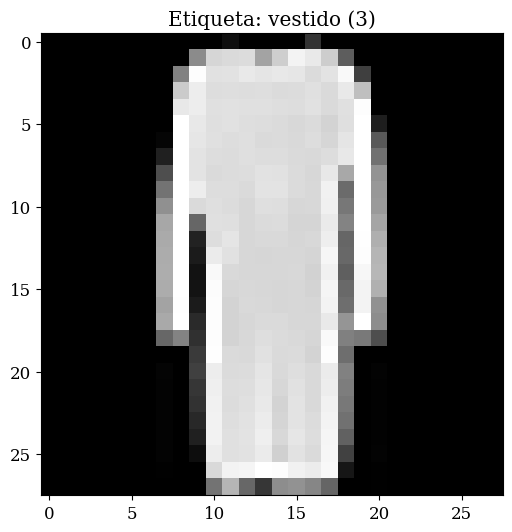

In [81]:
# Probemos diferentes valores de `image_index` para visualizar algunas imágenes
# del set de datos:
image_index = 25

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(X[image_index].reshape(28, 28), cmap='gray')
label = y[image_index]
ax.set_title('Etiqueta: {0} ({1})'.format(classes[label], label));

In [93]:
# Separemos los datos en 50,000 muestras de entrenamiento, 10,000 de validación
# y 10,000 de evaluación:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=20000, stratify=y, random_state=random_state
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, test_size=10000, stratify=y_val, random_state=random_state
)

# Normalicemos las caracterísitcas (los pixeles de 8 bits de profundidad tomas
# valores entre 0 y 255):
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

## Clasificación

In [94]:
# Definamos un modelo secuencial de Keras:
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(64, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(64, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(32, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.002)),
    keras.layers.Dense(10, activation='softmax', kernel_regularizer=keras.regularizers.l2(0.01)),
])

c:\Users\yomin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
# Veamos la descripción del modelo:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,306 (450.41 KB)

 Trainable params: 115,306 (450.41 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
# Compilemos el modelo con una función de pérdida, un optimizador y la accuracy
# como una métrica a seguir:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [97]:
%%time
# Entrenemos el modelo:
model.fit(
    X_train,
    y_train,
    batch_size=1024,
    epochs=100,
    validation_data=(X_val, y_val)
)

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6272 - loss: 1.8359 - val_accuracy: 0.7648 - val_loss: 1.4284
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7872 - loss: 1.3153 - val_accuracy: 0.8123 - val_loss: 1.2137
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8199 - loss: 1.1607 - val_accuracy: 0.8307 - val_loss: 1.1096
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8355 - loss: 1.0790 - val_accuracy: 0.8428 - val_loss: 1.0444
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8464 - loss: 1.0191 - val_accuracy: 0.8480 - val_loss: 0.9981
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8524 - loss: 0.9762 - val_accuracy: 0.8547 - val_loss: 0.9617
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8569 - loss: 0.9413 - val_accuracy: 0.8591 - val_loss: 0.9295
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8593 - loss: 0.9127 - val_accuracy: 0.8607 - 

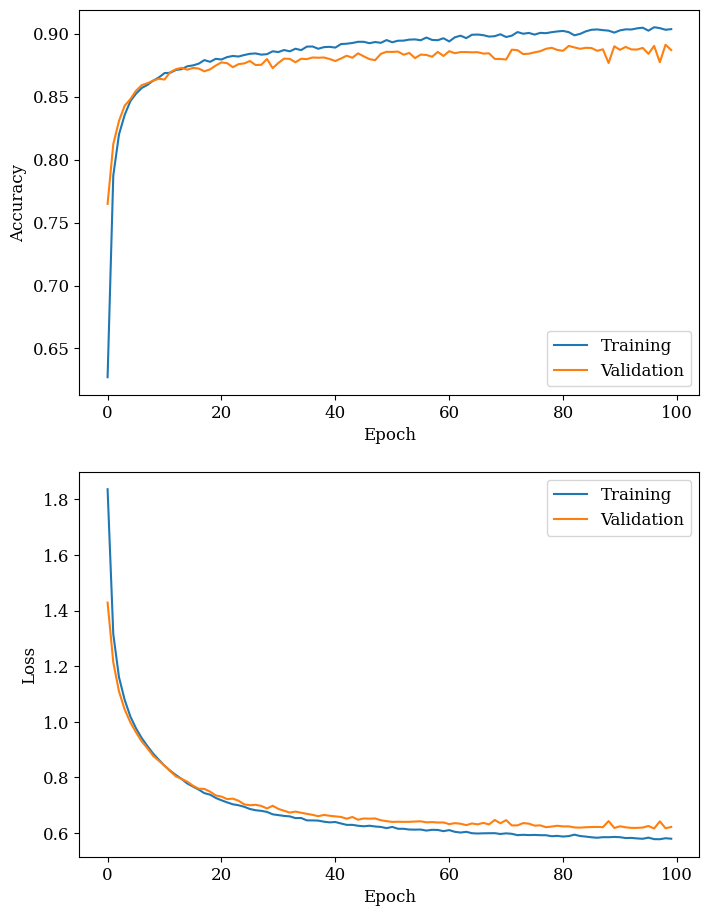

In [98]:
# Grafiquemos la pérdida y la accuracy de entrenamiento y validación a lo largo
# de las épocas de entrenamiento:

history = model.history.history

fig, ax = plt.subplots(2, 1, figsize=(8, 11))

ax[0].set_xlabel('Epoch', size=12)
ax[0].set_ylabel('Accuracy', size=12)
ax[0].plot(history['accuracy'])
ax[0].plot(history['val_accuracy'])
ax[0].legend(['Training', 'Validation'])

ax[1].set_xlabel('Epoch', size=12)
ax[1].set_ylabel('Loss', size=12)
ax[1].plot(history['loss'])
ax[1].plot(history['val_loss'])
ax[1].legend(['Training', 'Validation']);

In [99]:
# Hallemos la pérdida y la accuracy para el conjunto de prueba:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.8800 - loss: 0.6301


[0.6300565004348755, 0.8799999952316284]

In [100]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step


array([5, 2, 9, ..., 2, 2, 1], shape=(10000,))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step


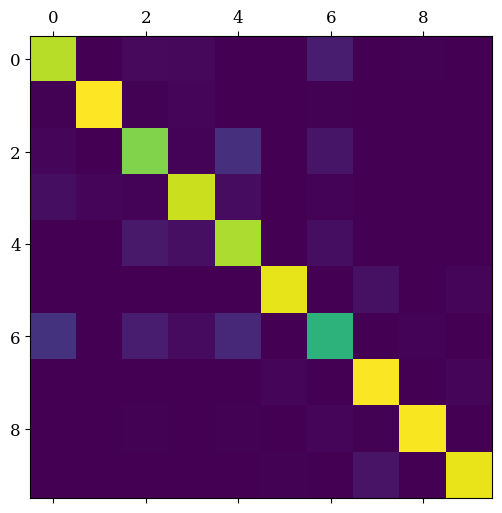

In [101]:
# Grafiquemos la matriz de confusión para el conjunto de prueba:
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=-1)))

## Red Neuronal Convolucional (Extra)

Se recomienda correr el siguiente código en Google Colaboratory con la aceleración con GPU activada.

In [102]:
conv_model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='tanh'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='tanh', kernel_regularizer=keras.regularizers.l2(1e-5)),
    keras.layers.Dense(10, activation='softmax', kernel_regularizer=keras.regularizers.l2(1e-4))
])

c:\Users\yomin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
conv_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │       173,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,930 (679.41 KB)

 Trainable params: 173,930 (679.41 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
conv_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0008),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [105]:
%%time
conv_model.fit(
    X_train.reshape(-1, 28, 28, 1),
    y_train,
    batch_size=512,
    epochs=50,
    validation_data=(X_val.reshape(-1, 28, 28, 1), y_val)
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7640 - loss: 0.7179 - val_accuracy: 0.8349 - val_loss: 0.4815
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8433 - loss: 0.4477 - val_accuracy: 0.8543 - val_loss: 0.4158
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8615 - loss: 0.3959 - val_accuracy: 0.8736 - val_loss: 0.3775
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8731 - loss: 0.3655 - val_accuracy: 0.8804 - val_loss: 0.3541
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8816 - loss: 0.3420 - val_accuracy: 0.8819 - val_loss: 0.3420
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8867 - loss: 0.3288 - val_accuracy: 0.8867 - val_loss: 0.3268
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8896 - loss: 0.3136 - val_accuracy: 0.8911 - val_loss: 0.3185
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8951 - loss: 0.3014 - val_accuracy: 0.8951 - v

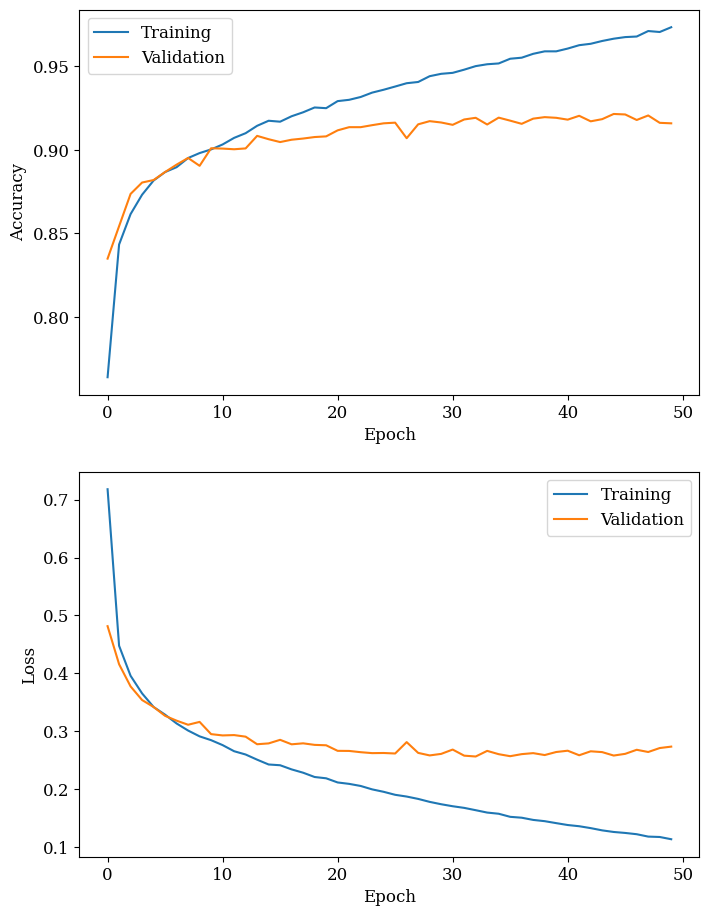

In [106]:
history = conv_model.history.history

fig, ax = plt.subplots(2, 1, figsize=(8, 11))

ax[0].set_xlabel('Epoch', size=12)
ax[0].set_ylabel('Accuracy', size=12)
ax[0].plot(history['accuracy'])
ax[0].plot(history['val_accuracy'])
ax[0].legend(['Training', 'Validation'])

ax[1].set_xlabel('Epoch', size=12)
ax[1].set_ylabel('Loss', size=12)
ax[1].plot(history['loss'])
ax[1].plot(history['val_loss'])
ax[1].legend(['Training', 'Validation']);

In [107]:
conv_model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9096 - loss: 0.2757


[0.2756594717502594, 0.909600019454956]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


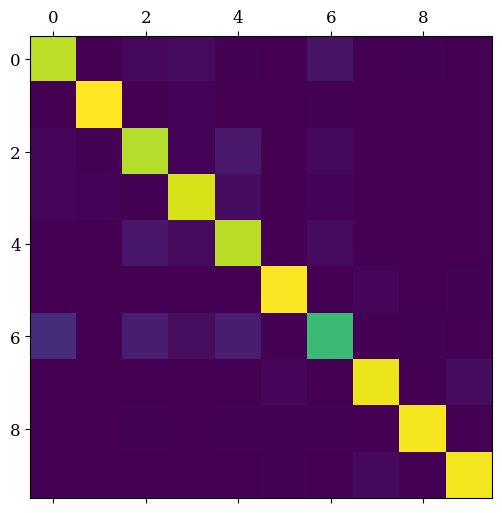

In [108]:
# Grafiquemos la matriz de confusión para el conjunto de prueba:
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(confusion_matrix(
    y_test,
    np.argmax(conv_model.predict(X_test.reshape(-1, 28, 28, 1)), axis=-1)
));